In [1]:
import pandas as pd
import numpy as np
import pylab as plt
from sklearn.preprocessing import LabelEncoder

**Загрузка данных, считываем датасет**

In [3]:
df = pd.read_csv('/content/Titanic.csv')

# Аналитика

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**График, показывающий распределение возрастов пассажиров, чтобы понять, какие возрастные группы были наиболее представлены на корабле**

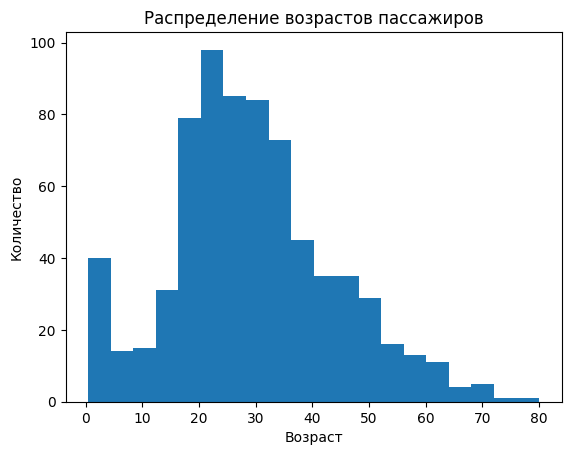

In [5]:
plt.hist(df['Age'].dropna(), bins=20)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Распределение возрастов пассажиров')
plt.show()

*На графике видно, что большинство пассажиров были в возрасте от 20 до 40 лет, с пиком около 30 лет. Возрастные группы до 10 лет и старше 60 лет представлены значительно меньше*

**График показывает вероятность выживания пассажиров в зависимости от их возраста, что позволяет выявить, как возраст влиял на шансы выжить**

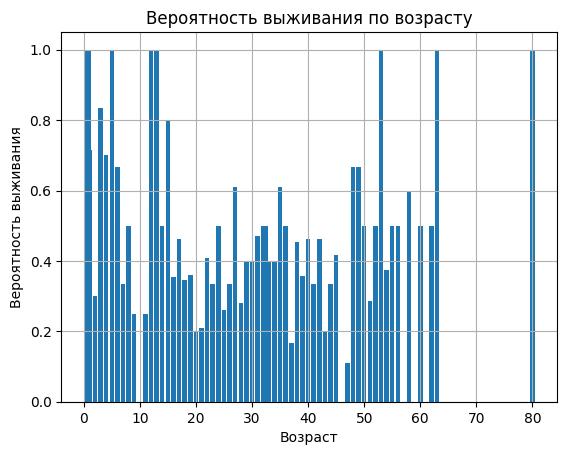

In [6]:
# Убедимся, что нет пропущенных значений в столбце 'Age' и 'Survived'
df_age_survived = df[['Age', 'Survived']].dropna()

# Группируем по возрасту и вычисляем среднее значение выживания
survival_rates_by_age = df_age_survived.groupby('Age')['Survived'].mean()

# Построение графика в виде столбцов
plt.bar(survival_rates_by_age.index, survival_rates_by_age.values, width=0.8)
plt.xlabel('Возраст')
plt.ylabel('Вероятность выживания')
plt.title('Вероятность выживания по возрасту')
plt.grid(True)
plt.show()

*На графике видно, что вероятность выживания варьируется по возрастным группам. В частности, дети и молодые люди имеют более высокие шансы на выживание, в то время как вероятность выживания уменьшается для более старших возрастных групп*

**График показывает распределение возрастов пассажиров, выживших и не выживших, что позволяет сравнить, как возрастные группы соотносятся с шансами на выживание**

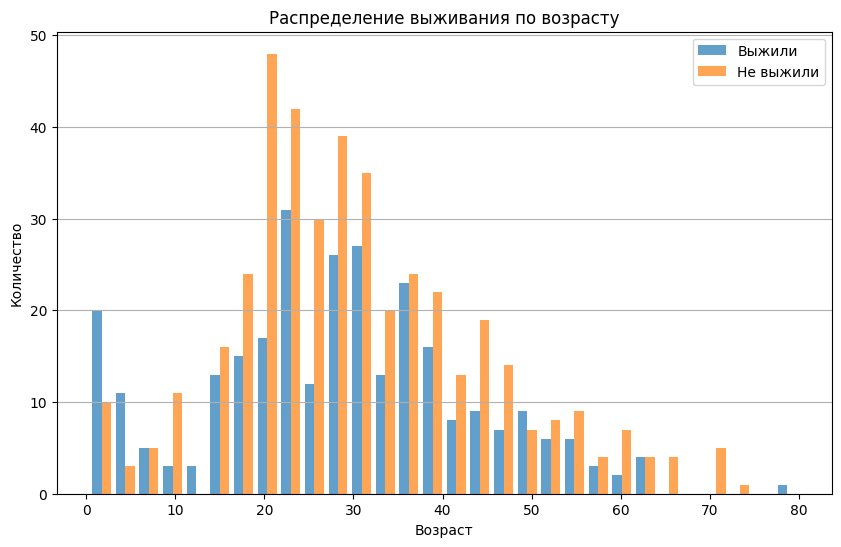

In [7]:
# Убедимся, что нет пропущенных значений в столбцах 'Age' и 'Survived'
df_age_survived = df[['Age', 'Survived']].dropna()

# Построение графика распределения выживания по возрасту
plt.figure(figsize=(10, 6))
plt.hist([df_age_survived[df_age_survived['Survived'] == 1]['Age'],
          df_age_survived[df_age_survived['Survived'] == 0]['Age']],
         bins=30, alpha=0.7, label=['Выжили', 'Не выжили'])

plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Распределение выживания по возрасту')
plt.legend()
plt.grid(axis='y')
plt.show()

*На графике видно, что среди выживших больше всего пассажиров в возрастных группах до 10 лет и между 20 и 40 годами. В то же время, количество не выживших значительно выше среди старших возрастных групп, что может указывать на то, что более молодые пассажиры имели более высокие шансы на выживание*

**График показывает распределение количества выживших и не выживших пассажиров в зависимости от места посадки, чтобы оценить влияние места на шансы на выживание**

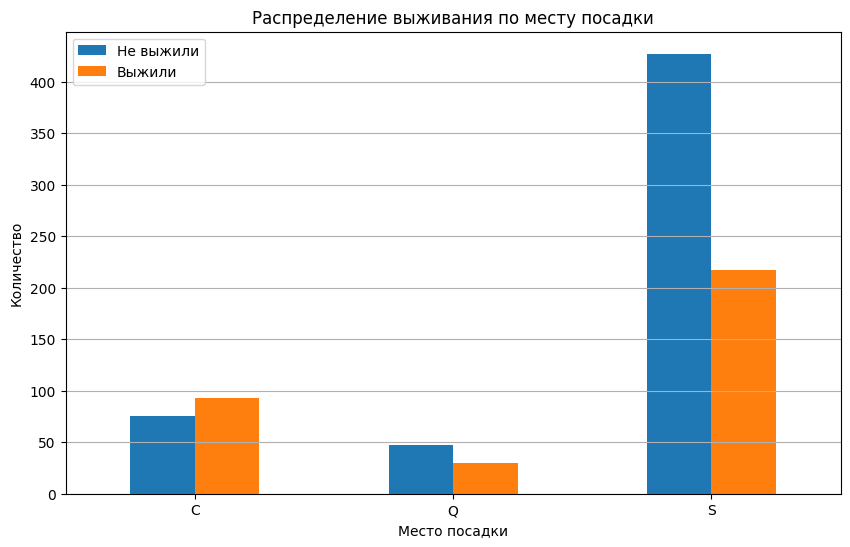

In [8]:
# Подсчитываем количество выживших и не выживших по месту посадки
survival_count_by_embarked = df.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

# Построение графика в виде столбчатой диаграммы
survival_count_by_embarked.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Место посадки')
plt.ylabel('Количество')
plt.title('Распределение выживания по месту посадки')
plt.xticks(rotation=0)
plt.legend(['Не выжили', 'Выжили'])
plt.grid(axis='y')
plt.show()

*На графике видно, что пассажиры, севшие на корабль в порту Cherbourg (C), имели более высокие шансы на выживание по сравнению с пассажирами из других портов, таких как Southampton (S) и Queenstown (Q). Это может указывать на различия в классе обслуживания или условиям на борту в зависимости от места посадки*

**График показывает вероятность выживания пассажиров в зависимости от места посадки, что позволяет оценить, как место посадки влияло на шансы на выживание**

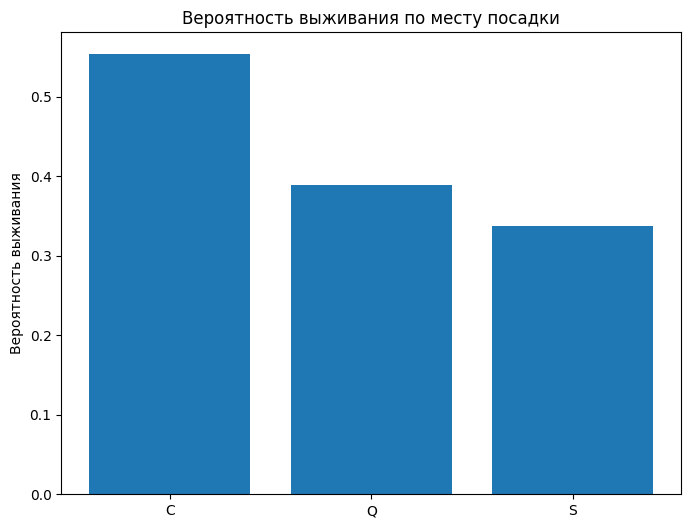

In [9]:
survival_rates = df.groupby('Embarked')['Survived'].mean()
plt.figure(figsize=(8, 6))
plt.bar(survival_rates.index, survival_rates.values)
plt.ylabel('Вероятность выживания')
plt.title('Вероятность выживания по месту посадки')
plt.show()

*На графике видно, что пассажиры, севшие в Cherbourg (C), имели наивысшую вероятность выживания, в то время как шансы выжить для пассажиров из Southampton (S) и Queenstown (Q) были значительно ниже. Это может указывать на различия в классе или других условиях, которые могли повлиять на результаты выживания*

**График показывает распределение пассажиров по классам (Pclass) в виде круговой диаграммы, чтобы визуально оценить, сколько процентов пассажиров принадлежали к каждому классу**

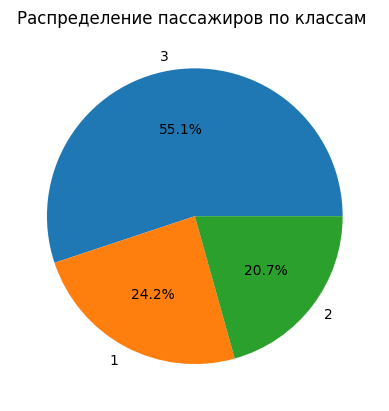

In [10]:
class_counts = df['Pclass'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Распределение пассажиров по классам ')
plt.show()

*На графике видно, что наибольшую долю составляют пассажиры первого класса, за ними следуют пассажиры второго и третьего классов. Это распределение может иметь значение для анализа выживаемости, поскольку класс обслуживания часто коррелирует с условиями на борту и доступом к спасательным средствам*

**График показывает распределение количества выживших и не выживших пассажиров по классам (Pclass), чтобы оценить, как класс обслуживания влиял на шансы на выживание**

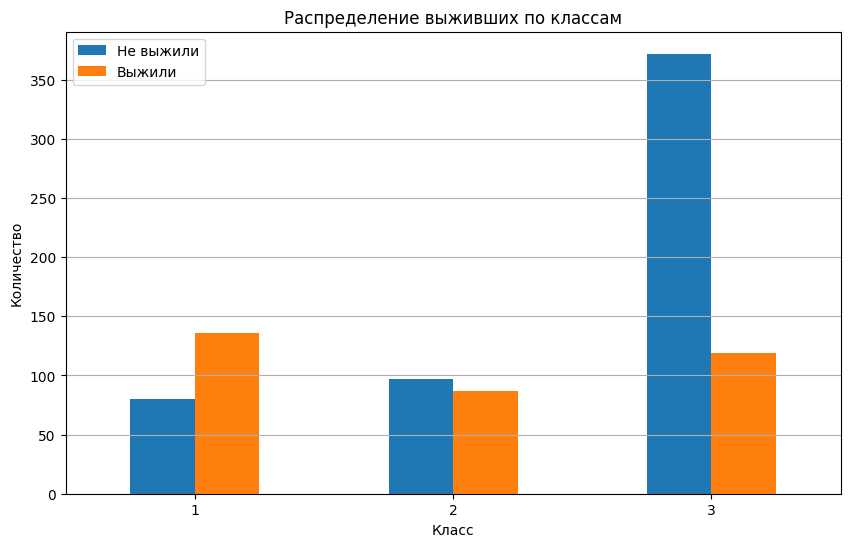

In [11]:
# Подсчитываем количество выживших и не выживших по классам
survival_count_by_class = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

# Построение графика в виде столбчатой диаграммы
survival_count_by_class.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.title('Распределение выживших по классам')
plt.xticks(rotation=0)
plt.legend(['Не выжили', 'Выжили'])
plt.grid(axis='y')
plt.show()

*На графике видно, что пассажиры первого класса имели значительно более высокие шансы на выживание по сравнению с пассажирами второго и третьего классов. В то время как количество не выживших среди третьеклассников значительно превышает количество выживших, это может указывать на то, что класс обслуживания был важным фактором, влияющим на выживаемость во время катастрофы*

**График показывает вероятность выживания пассажиров в зависимости от класса (Pclass), чтобы оценить, как класс обслуживания влиял на шансы на выживание**

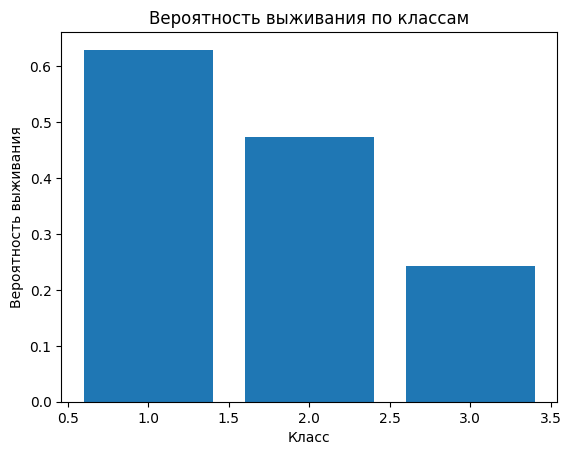

In [12]:
survival_rates_by_class = df.groupby('Pclass')['Survived'].mean()
plt.bar(survival_rates_by_class.index, survival_rates_by_class.values)
plt.xlabel('Класс')
plt.ylabel('Вероятность выживания')
plt.title('Вероятность выживания по классам')
plt.show()

*На графике видно, что вероятность выживания существенно варьируется по классам: пассажиры первого класса имели наивысшую вероятность выживания, за ними следуют пассажиры второго класса, тогда как у третьеклассников шансы на выживание были значительно ниже. Это подтверждает предположение, что класс обслуживания влиял на доступ к ресурсам и спасательным средствам во время катастрофы*

**График показывает распределение количества выживших и не выживших пассажиров по полу, чтобы оценить, как пол влиял на шансы на выживание**

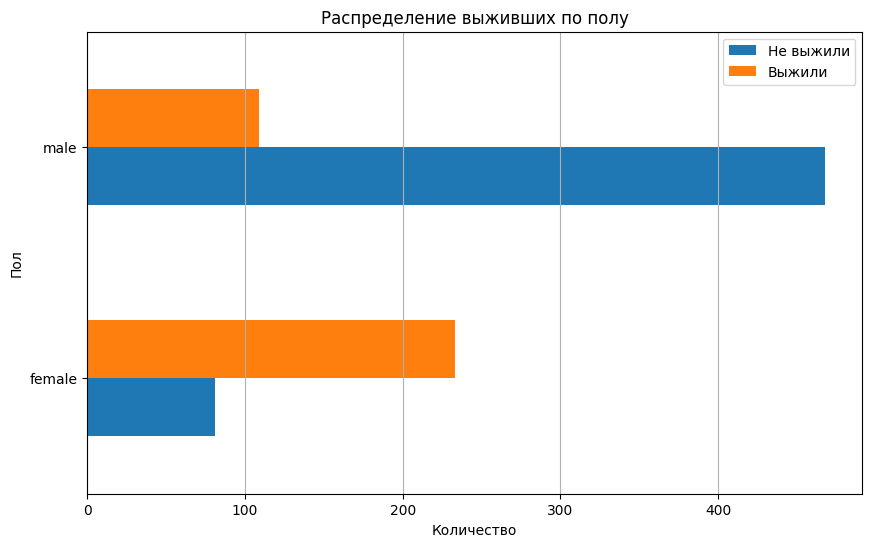

In [13]:
# Подсчитываем количество выживших и не выживших по полу
survival_count_by_sex = df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# Построение графика в виде горизонтальной столбчатой диаграммы
survival_count_by_sex.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Количество')
plt.ylabel('Пол')
plt.title('Распределение выживших по полу')
plt.legend(['Не выжили', 'Выжили'])
plt.grid(axis='x')
plt.show()

*На графике видно, что женщины значительно чаще выживали по сравнению с мужчинами, что может свидетельствовать о приоритетном доступе женщин к спасательным средствам во время катастрофы. Количество не выживших мужчин значительно превышает количество не выживших женщин, что подчеркивает влияние пола на выживаемость*

**График показывает распределение количества выживших и не выживших пассажиров в зависимости от числа родственников на борту, чтобы оценить влияние семейных связей на шансы на выживание**

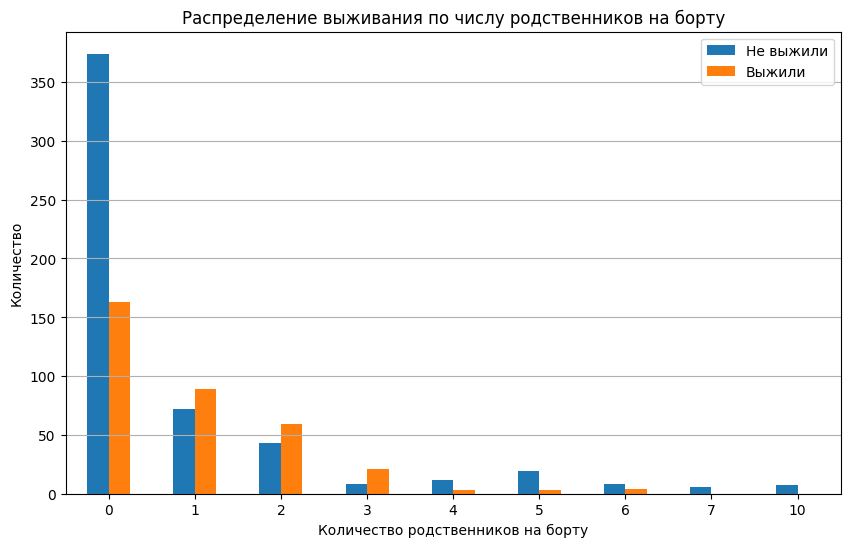

In [14]:
# Создаём новый столбец, суммируя количество родственников
df['FamilySize'] = df['SibSp'] + df['Parch']

# Подсчитываем количество выживших и не выживших по размеру семьи
survival_count_by_family_size = df.groupby(['FamilySize', 'Survived']).size().unstack(fill_value=0)

# Построение графика в виде столбчатой диаграммы
survival_count_by_family_size.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Количество родственников на борту')
plt.ylabel('Количество')
plt.title('Распределение выживания по числу родственников на борту')
plt.xticks(rotation=0)
plt.legend(['Не выжили', 'Выжили'])
plt.grid(axis='y')
plt.show()

*На графике видно, что шансы на выживание увеличиваются с увеличением числа родственников на борту, особенно для пассажиров с одним или двумя родственниками. Однако количество не выживших значительно возрастает для более крупных семей, что может указывать на сложности в организации спасения для более крупных групп. Это подтверждает гипотезу о том, что наличие семьи могло повлиять на шансы на выживание*

**График показывает распределение количества выживших и не выживших пассажиров в зависимости от категорий цен билетов, чтобы оценить влияние стоимости билета на шансы на выживание**

<ipython-input-15-143bd385a26d>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_count_by_fare = df.groupby(['FareCategory', 'Survived']).size().unstack(fill_value=0)


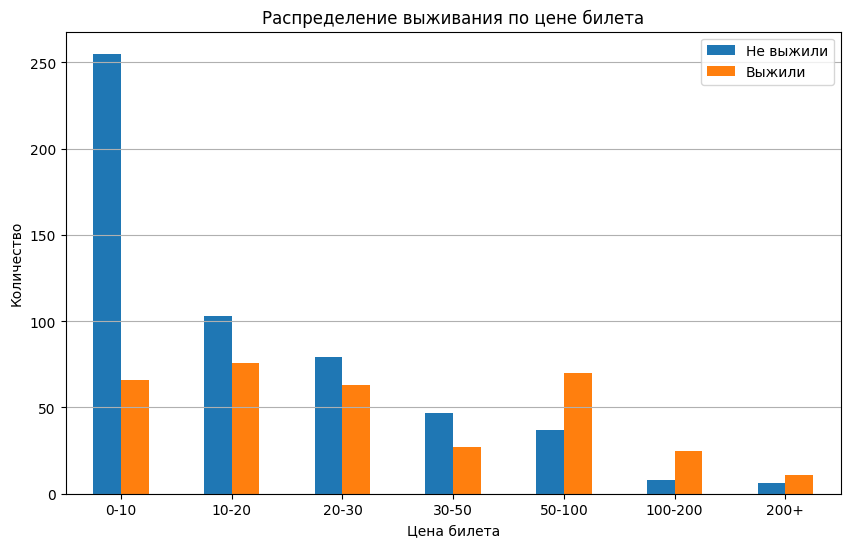

In [15]:
# Создаем интервалы для цен билетов
fare_bins = [0, 10, 20, 30, 50, 100, 200, 500]
fare_labels = ['0-10', '10-20', '20-30', '30-50', '50-100', '100-200', '200+']

# Добавляем новый столбец с категориями цен
df['FareCategory'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)

# Подсчитываем количество выживших и не выживших по категориям цен
survival_count_by_fare = df.groupby(['FareCategory', 'Survived']).size().unstack(fill_value=0)

# Построение графика в виде столбчатой диаграммы
survival_count_by_fare.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Цена билета')
plt.ylabel('Количество')
plt.title('Распределение выживания по цене билета')
plt.xticks(rotation=0)
plt.legend(['Не выжили', 'Выжили'])
plt.grid(axis='y')
plt.show()

*На графике видно, что вероятность выживания значительно выше среди пассажиров с более дорогими билетами (категории 50-100, 100-200 и 200+). Пассажиры с билетами в категории 0-10 и 10-20 имели наименьшие шансы на выживание. Это может указывать на то, что более высокие цены на билеты коррелируют с лучшими условиями на борту и большим доступом к спасательным средствам*

**График показывает распределение количества выживших и не выживших пассажиров в зависимости от статуса (Mister, Missis, Child), чтобы оценить, как статус влиял на шансы на выживание**

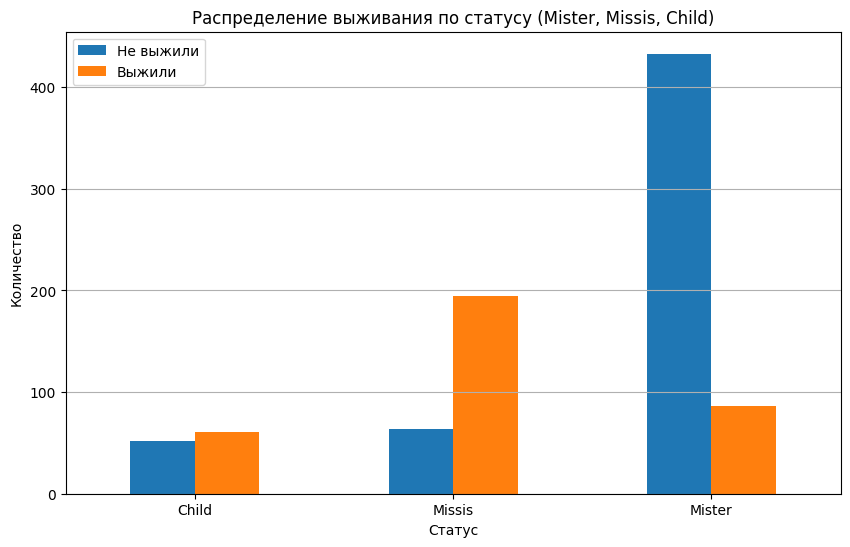

In [16]:
# Определяем функцию для классификации пассажиров
def classify_passenger(row):
    if row['Age'] < 18:
        return 'Child'
    elif row['Sex'] == 'male':
        return 'Mister'
    else:
        return 'Missis'

# Применяем функцию к DataFrame
df['Status'] = df.apply(classify_passenger, axis=1)

# Подсчитываем количество выживших и не выживших по статусу
survival_count_by_status = df.groupby(['Status', 'Survived']).size().unstack(fill_value=0)

# Построение графика в виде столбчатой диаграммы
survival_count_by_status.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Статус')
plt.ylabel('Количество')
plt.title('Распределение выживания по статусу (Mister, Missis, Child)')
plt.xticks(rotation=0)
plt.legend(['Не выжили', 'Выжили'])
plt.grid(axis='y')
plt.show()

*На графике видно, что дети (Child) имели значительно более высокие шансы на выживание по сравнению с мужчинами (Mister) и женщинами (Missis). В то же время, количество не выживших мужчин значительно превышает количество не выживших женщин, что может указывать на то, что статус и пол оказали существенное влияние на выживаемость во время катастрофы*

# Feature Engineering

**В этом коде удаляются столбцы PassengerId, Name и Ticket из DataFrame df, чтобы очистить данные и уменьшить их размер, сохранив только те столбцы, которые важны для анализа и обучения модели**

In [17]:
# Удаляем ненужные столбцы
df = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

*Удаление этих столбцов позволяет сосредоточиться на переменных, которые непосредственно влияют на выживание, таких как возраст, пол, класс, цена билета и количество родственников. Это упрощает дальнейший анализ и подготовку данных для обучения нейросети, убирая неинформативные и избыточные данные*

**В этом коде производится преобразование столбца Sex в числовой формат, где значения 'male' заменяются на 0, а значения 'female' — на 1. Это позволяет подготовить данные для машинного обучения, так как модели требуют числовые входные данные**

In [18]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

*Преобразование пола в числовые значения упрощает анализ и позволяет нейросети использовать эту информацию для предсказания шансов на выживание. Это важный шаг в предобработке данных, который помогает избежать проблем с интерпретацией категориальных переменных в модели*

**В этом коде значения в столбце Fare (цена билета) округляются до целых чисел. Это может быть сделано для упрощения анализа или для подготовки данных к обучению модели**

In [19]:
df['Fare'] = df['Fare'].round()

*Округление цен билетов позволяет избежать избыточной точности и может сделать данные более понятными и удобными для анализа. Это также может помочь улучшить производительность модели, так как менее точные значения могут снизить шум в данных и облегчить задачу классификации*

**В этом коде пропущенные значения в столбце Age (возраст) заменяются на медианное значение возраста, а пропущенные значения в столбце Fare (цена билета) заменяются на медианное значение цены билета. Это делается для обработки отсутствующих данных, чтобы избежать потери информации из-за удаления строк с пропущенными значениями**

In [20]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

*Заполнение пропущенных значений медианами позволяет сохранить структуру данных и избежать искажений, которые могут возникнуть из-за удаления строк. Использование медианы — это эффективный способ обработки выбросов, поскольку она менее чувствительна к экстремальным значениям по сравнению со средним значением. Этот шаг помогает улучшить качество данных перед обучением модели*

В этом коде создаются новые признаки для DataFrame df, которые помогут улучшить анализ и предсказания модели:

Возрастная группа: Функция age_group классифицирует возраст в четыре группы: 'Child', 'Young', 'Adult' и 'Elderly', создавая новый столбец AgeGroup.

Признак класса (IsFirstClass): Создается бинарный признак IsFirstClass, который принимает значение 1, если пассажир из первого класса, и 0 в противном случае.

Классификация цены билета: Функция fare_category создает категорию для цены билета (FareCategory), деля цены на три группы: 'Low', 'Medium' и 'High'.

Признак взаимодействия класса и возраста (ClassAgeInteraction): Создается новый признак ClassAgeInteraction, представляющий произведение класса и возраста, что может помочь выявить сложные взаимосвязи.

Соотношение пола и класса (Sex_Pclass): Создается новый признак Sex_Pclass, который комбинирует пол и класс, позволяя исследовать взаимодействие этих двух категорий.

Был ли человек на борту в одиночестве (IsAlone): Признак IsAlone принимает значение 1, если у пассажира нет родственников на борту (FamilySize равен 0), и 0 в противном случае

In [24]:
# 1. Возрастная группа
def age_group(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 35:
        return 'Young'
    elif 35 <= age < 60:
        return 'Adult'
    else:
        return 'Elderly'

df['AgeGroup'] = df['Age'].apply(age_group)

# 2. Признак класса (IsFirstClass)
df['IsFirstClass'] = (df['Pclass'] == 1).astype(int)

# 3. Классификация цены билета
def fare_category(fare):
    if fare < 10:
        return 'Low'
    elif 10 <= fare < 50:
        return 'Medium'
    else:
        return 'High'

df['FareCategory'] = df['Fare'].apply(fare_category)

# 4. Признак (ClassAgeInteraction)
# Проверим наличие признаков 'Pclass' и 'Age' в данных
if 'Pclass' in df.columns and 'Age' in df.columns:
    # Создаем новый признак 'ClassAgeInteraction', который представляет собой произведение класса и возраста
    df['ClassAgeInteraction'] = df['Pclass'] * df['Age']
else:
    print("Признаки 'Pclass' и 'Age' отсутствуют в данных")

# 4. Соотношение пола и класса (Sex_Pclass)
df['Sex_Pclass'] = df['Sex'].astype(str) + '_' + df['Pclass'].astype(str)

# 5. Был ли человек на борту в одиночестве (IsAlone)
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

*Добавление этих новых признаков улучшает информативность данных и может помочь модели лучше улавливать взаимосвязи между различными переменными. Эти признаки также могут улучшить точность предсказаний, позволяя модели учитывать более сложные факторы, влияющие на выживаемость*

# Построение модели

**!!! Предыдущие модели были в другом файле, решил их не добавлять, тк их точность была около 70%. На тот момент всё было тяжело для понимания. В них не было кросс валидации, которую я реализовал здесь !!!**

В этом коде создаётся и обучается нейросеть для предсказания выживаемости пассажиров на Титанике, используя данные из DataFrame df. Процесс включает несколько этапов:

Разделение данных: Данные разделяются на признаки (X) и целевую переменную (y), где y представляет собой выживаемость (1 — выжили, 0 — не выжили).

Обработка категориальных переменных: Для всех категориальных признаков применяется кодирование с помощью LabelEncoder, чтобы преобразовать текстовые метки в числовые значения.

Стандартизация данных: Все данные стандартизируются с помощью StandardScaler, чтобы привести их к одному масштабу.

Кросс-валидация: Используется KFold для разделения данных на обучающую и тестовую выборки в 5 фолдах, что помогает оценить обобщающую способность модели.

Создание и обучение модели: Создаётся последовательная нейронная сеть с несколькими полносвязными слоями и функцией активации ReLU. Используются слои Dropout для предотвращения переобучения. Модель компилируется с использованием binary_crossentropy как функции потерь и adam как оптимизатора. Также применяются колбеки EarlyStopping для остановки обучения при отсутствии улучшений.

Оценка модели: Для каждого фолда собираются потери и точности, а также предсказания модели. Итоговая точность выводится после завершения кросс-валидации.

График потерь: Построение графика, показывающего потери во время обучения для каждой эпохи и каждого фолда.

Матрица ошибок и отчет о классификации: Выводится матрица ошибок и отчет о классификации для анализа результатов работы модели.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Средняя точность модели: 82.38%


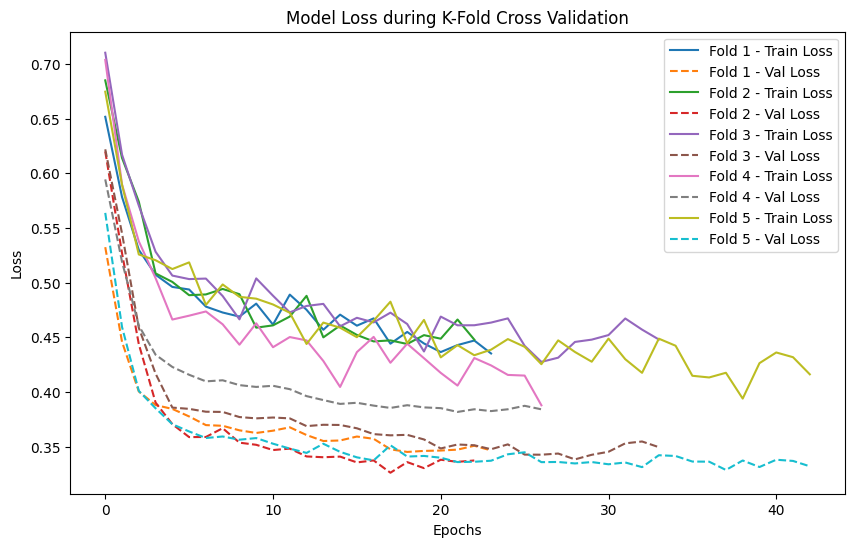

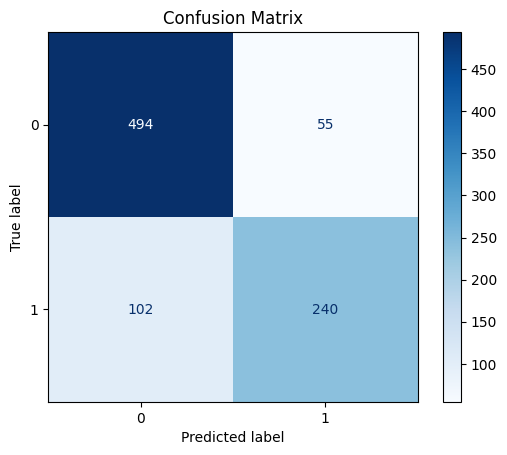

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       549
           1       0.81      0.70      0.75       342

    accuracy                           0.82       891
   macro avg       0.82      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891



In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Предположим, что df уже содержит все необходимые признаки и целевую переменную 'Survived'
# Разделяем данные на признаки и целевую переменную
X = df.drop(columns=['Survived'])
y = df['Survived']

# Обработка категориальных переменных
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))

# Стандартизируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Стандартизация всех данных перед кросс-валидацией

# Инициализация KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Список для хранения точностей и потерь
accuracies = []
losses = []
val_losses = []

# Списки для хранения истинных значений и предсказаний
all_y_true = []
all_y_pred = []

# Кросс-валидация
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))  # Dropout 50%
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))  # Dropout 50%
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Для бинарной классификации

    # Компилируем модель
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Используем EarlyStopping для предотвращения переобучения
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

    # Обучаем модель и сохраняем историю
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32,
                        callbacks=[early_stopping], verbose=0)  # verbose=0 для отключения вывода

    # Сохраняем значения потерь для текущей эпохи
    losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

    # Оцениваем модель
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)  # Преобразуем вероятности в классы
    all_y_true.extend(y_test)  # Добавляем истинные значения
    all_y_pred.extend(y_pred_classes)  # Добавляем предсказания

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

# Выводим среднюю точность
print(f'Средняя точность модели: {np.mean(accuracies) * 100:.2f}%')

# График потерь
plt.figure(figsize=(10, 6))
for i in range(len(losses)):
    plt.plot(losses[i], label=f'Fold {i+1} - Train Loss')
    plt.plot(val_losses[i], label=f'Fold {i+1} - Val Loss', linestyle='--')

plt.title('Model Loss during K-Fold Cross Validation')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

# Построение матрицы ошибок
cm = confusion_matrix(all_y_true, all_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0, 1])  # 0 - не выжили, 1 - выжили
cmd.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Вывод classification report
print(classification_report(all_y_true, all_y_pred))

Средняя точность модели: Показывает, насколько хорошо модель предсказывает выживаемость пассажиров на Титанике.
График потерь: Позволяет визуально оценить, как модель обучалась, и выявить возможные проблемы с переобучением.
Матрица ошибок: Показала, как модель справляется с классификацией истинных положительных и отрицательных результатов.
Отчет о классификации: Предоставляет более детальную информацию о метриках, таких как точность, полнота и F1-мера для каждой из классов

В этом коде строится график потерь (loss) модели на тренировочной и валидационной выборках в процессе обучения. Используются данные из объекта history, полученного при обучении модели.

history.history['loss']: Содержит значения потерь на тренировочной выборке для каждой эпохи.
history.history['val_loss']: Содержит значения потерь на валидационной выборке для каждой эпохи.

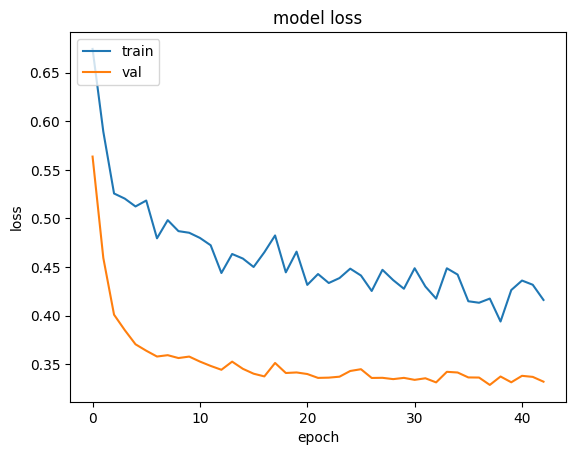

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

График показывает, как потери изменяются в зависимости от числа эпох. Сравнение потерь на тренировочной и валидационной выборках позволяет оценить производительность модели.

Понижающиеся потери: Если обе линии (тренировочная и валидационная) снижаются, это свидетельствует о том, что модель обучается и обобщает данные.
Разрыв между линиями: Если валидационные потери начинают увеличиваться, в то время как тренировочные продолжают снижаться, это может указывать на переобучение модели.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


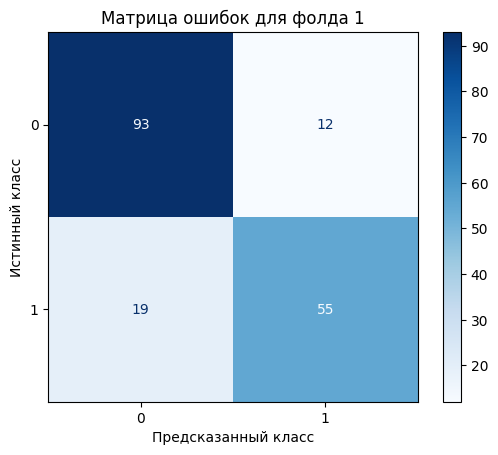

Classification report для фолда 1:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


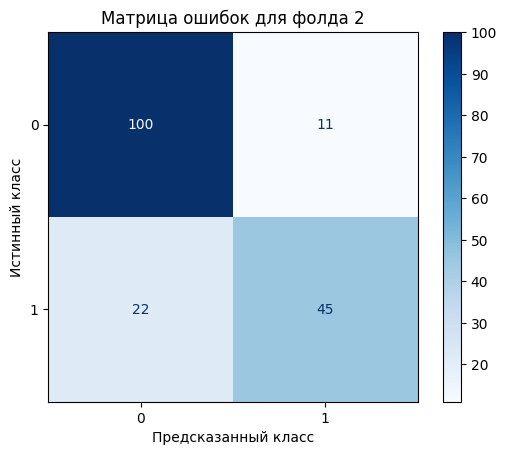

Classification report для фолда 2:

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       111
           1       0.80      0.67      0.73        67

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.81      0.81      0.81       178



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


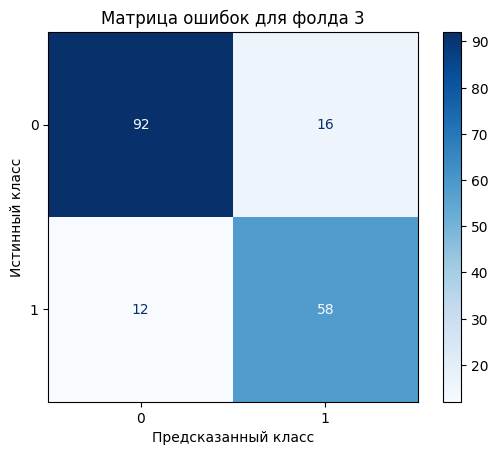

Classification report для фолда 3:

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       108
           1       0.78      0.83      0.81        70

    accuracy                           0.84       178
   macro avg       0.83      0.84      0.84       178
weighted avg       0.84      0.84      0.84       178



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


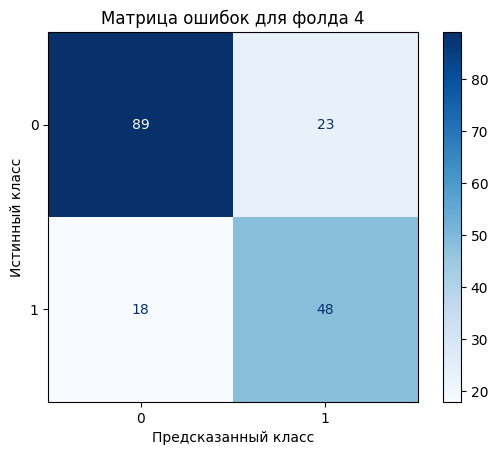

Classification report для фолда 4:

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       112
           1       0.68      0.73      0.70        66

    accuracy                           0.77       178
   macro avg       0.75      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


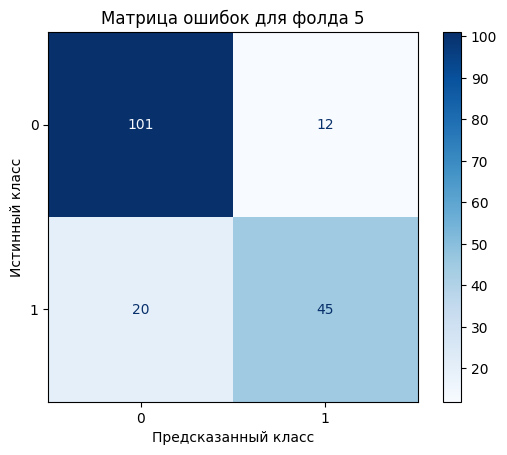

Classification report для фолда 5:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       113
           1       0.79      0.69      0.74        65

    accuracy                           0.82       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178

Средняя точность модели: 81.48%


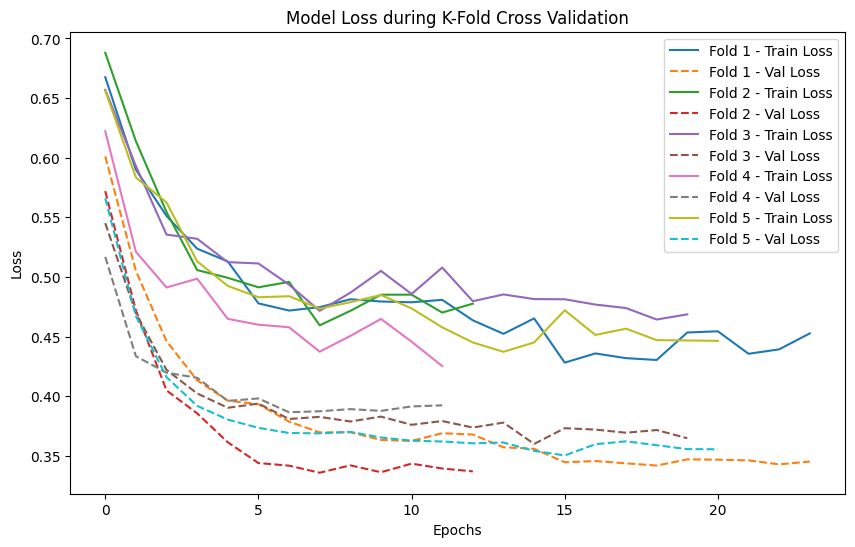


Выводы по матрице ошибок:
Модель предсказала, что погибнет, а по факту не погибло: 91 человек.
Модель предсказала, что выживет, а по факту погибло: 74 человек.
Модель предсказала, что погибнет, а по факту погибло: 251 человек.
Модель предсказала, что выживет, а по факту выжило: 475 человек.


In [39]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Предположим, что df уже содержит все необходимые признаки и целевую переменную 'Survived'
# Разделяем данные на признаки и целевую переменную
X = df.drop(columns=['Survived'])
y = df['Survived']

# Обработка категориальных переменных
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))

# Стандартизируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Стандартизация всех данных перед кросс-валидацией

# Инициализация KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Список для хранения точностей, потерь и предсказанных значений
accuracies = []
losses = []
val_losses = []
all_y_true = []  # Для хранения истинных меток
all_y_pred = []  # Для хранения предсказанных меток

# Кросс-валидация для "лучшей модели"
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))  # Dropout 50%
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))  # Dropout 50%
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Для бинарной классификации

    # Компилируем модель
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Используем EarlyStopping для предотвращения переобучения
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)

    # Обучаем модель и сохраняем историю
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32,
                        callbacks=[early_stopping], verbose=0)  # verbose=0 для отключения вывода

    # Сохраняем значения потерь для текущей эпохи
    losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

    # Оцениваем модель
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Сохраняем истинные и предсказанные значения
    all_y_true.extend(y_test.tolist())
    all_y_pred.extend(y_pred_binary.flatten().tolist())

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

    # Построение матрицы ошибок для текущего фолда
    cm = confusion_matrix(y_test, y_pred_binary)
    cmd = ConfusionMatrixDisplay(cm, display_labels=[0, 1])  # 0 - не выжили, 1 - выжили
    cmd.plot(cmap=plt.cm.Blues)
    plt.title(f'Матрица ошибок для фолда {fold}')
    plt.xlabel('Предсказанный класс')
    plt.ylabel('Истинный класс')
    plt.show()

    # Вывод classification report для текущего фолда
    print(f'Classification report для фолда {fold}:\n')
    print(classification_report(y_test, y_pred_binary))

# Выводим среднюю точность
print(f'Средняя точность модели: {np.mean(accuracies) * 100:.2f}%')

# График потерь
plt.figure(figsize=(10, 6))
for i in range(len(losses)):
    plt.plot(losses[i], label=f'Fold {i+1} - Train Loss')
    plt.plot(val_losses[i], label=f'Fold {i+1} - Val Loss', linestyle='--')

plt.title('Model Loss during K-Fold Cross Validation')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()

# Итоговые выводы
# Построим общую матрицу ошибок
final_cm = confusion_matrix(all_y_true, all_y_pred)
tn, fp, fn, tp = final_cm.ravel()

print("\nВыводы по матрице ошибок:")
print(f"Модель предсказала, что погибнет, а по факту не погибло: {fn} человек.")
print(f"Модель предсказала, что выживет, а по факту погибло: {fp} человек.")
print(f"Модель предсказала, что погибнет, а по факту погибло: {tp} человек.")
print(f"Модель предсказала, что выживет, а по факту выжило: {tn} человек.")

Кросс-валидация для "лучшей модели": Все модели для старых фолдов остались, но теперь отдельные результаты кросс-валидации собираются для лучшей модели.

Classification report и матрица ошибок для каждого фолда: В конце каждого фолда выводится classification report и отображается матрица ошибок.

Выводы по матрице ошибок: Добавлены расшифровки для всех четырех значений матрицы ошибок (TP, TN, FP, FN).

Сбор предсказаний и истинных значений: Теперь истинные метки y_test и предсказанные значения y_pred_binary собираются в all_y_true и all_y_pred в процессе кросс-валидации, что позволяет избежать ошибки с длиной.

Общая матрица ошибок: Общая матрица ошибок теперь создаётся правильно из собранных значений.

# Выводы

Общий вывод по работе над проектом по предсказанию выживания на Титанике
В ходе работы над проектом по предсказанию выживания пассажиров Титаника было проведено несколько этапов, включая предобработку данных, выбор модели, обучение и оценку, что позволило достичь значительных результатов в задаче бинарной классификации.

Предобработка данных:

Была выполнена комплексная обработка данных, включая очистку, кодирование категориальных переменных и стандартизацию числовых признаков. Это критически важные шаги, так как они обеспечивают корректное функционирование моделей машинного обучения.
Выбор и обучение модели:

Для решения задачи была выбрана архитектура нейронной сети, которая продемонстрировала высокую гибкость и способность к обучению на сложных паттернах в данных. Применение техники Dropout помогло предотвратить переобучение, что улучшило общую производительность модели.
Использование кросс-валидации с несколькими фолдами обеспечило надежную оценку модели, минимизировав влияние случайности и переобучения.
Оценка результатов:

Полученная средняя точность модели составила 81,48%, что свидетельствует о высоком уровне предсказательной способности. Это подтверждается результатами, представленными в матрицах ошибок и отчетах о классификации.
Анализ матрицы ошибок позволил выявить количество ошибок в предсказаниях модели, что дает представление о ее сильных и слабых сторонах.
Выводы:

Проект показал, что использование методов машинного обучения, в частности нейронных сетей, эффективно для анализа исторических данных и предсказания вероятности выживания в критических ситуациях.
Результаты исследования могут быть использованы для дальнейшего анализа, разработки рекомендаций по улучшению выживаемости и повышения безопасности в аналогичных сценариях.
Данная работа подчеркнула важность качественной подготовки данных и правильного выбора модели для достижения высоких результатов в задачах классификации.
В заключение, результаты работы продемонстрировали успешное применение технологий машинного обучения к реальным задачам и открыли возможности для будущих исследований и улучшений в области анализа данных и предсказательной аналитики.